<a href="https://colab.research.google.com/github/FKz11/study_mpei/blob/main/energy_hope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Олимпиада "Надежда энергетики"

### Загружаем библиотеки

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Формируем идеальные и реальные данные

Дано:

In [2]:
V = 0.1
dt = 0.05
l = 0.2
h = 0.3
R = 0.1
T = 20
steps = int(T/dt)
steps

400

## 1. Выразить omega

Функция для нахождения угловых скоростей колёс по заданным скоростям платформы

In [3]:
def get_omega(df, l, h, R):
  df['omega_1'] = (df['Vx'] + df['Vy'] + (h - l)*df['dpsi'])/R
  df['omega_2'] = (df['Vx'] - df['Vy'] - (h - l)*df['dpsi'])/R
  df['omega_3'] = (df['Vx'] + df['Vy'] - (h + l)*df['dpsi'])/R
  df['omega_4'] = (df['Vx'] - df['Vy'] + (h + l)*df['dpsi'])/R
  return df

## 2. Сформировать скорости при движении по траектории

In [4]:
degree = np.pi*2/360

In [5]:
Vx_1, Vy_1 = V, 0.0
Vx_2, Vy_2 = V*np.sin(60*degree), -V*np.cos(60*degree)
Vx_3, Vy_3 = -V*np.sin(60*degree), -V*np.cos(60*degree)
Vx_4, Vy_4 = -V, 0.0
Vx_5, Vy_5 = 0.0, V
V_o = [[Vx_1, Vy_1], [Vx_2, Vy_2], [Vx_3, Vy_3], [Vx_4, Vy_4], [Vx_5, Vy_5]]
V_o

[[0.1, 0.0],
 [0.08660254037844387, -0.05000000000000002],
 [-0.08660254037844387, -0.05000000000000002],
 [-0.1, 0.0],
 [0.0, 0.1]]

Сформируем идеальные данные

In [6]:
def get_t_list(steps, dt):
  t_temp = 0
  t_list = []
  for _ in range(steps):
    t_list.append(t_temp)
    t_temp += dt
  return t_list

In [7]:
steps_on_line = int(steps / len(V_o))
data_ideal = np.array([vx_vy*steps_on_line for vx_vy in V_o]).flatten().reshape(steps, 2)
df_ideal = pd.DataFrame(data_ideal, columns=['Vx', 'Vy'])
df_ideal['t'] = get_t_list(steps, dt)
df_ideal.loc[steps] = [0, 0, T]
df_ideal['dpsi'] = [0]*(steps+1)
df_ideal = df_ideal.reindex(columns=['t', 'Vx', 'Vy', 'dpsi'])
df_ideal

,t,Vx,Vy,dpsi
0,0.00,0.1,0.0,0
1,0.05,0.1,0.0,0
2,0.10,0.1,0.0,0
3,0.15,0.1,0.0,0
4,0.20,0.1,0.0,0
...,...,...,...,...
396,19.80,0.0,0.1,0
397,19.85,0.0,0.1,0
398,19.90,0.0,0.1,0
399,19.95,0.0,0.1,0


Функция для нахождения координат по скоростям

In [8]:
def integral(V, dt):
  Integral_V=[]
  sum=0
  for v in V:
    Integral_V.append(sum)
    sum+=v*dt
  return np.array(Integral_V)

In [9]:
df_ideal['X'] = integral(df_ideal['Vx'], dt)
df_ideal['Y'] = integral(df_ideal['Vy'], dt)
df_ideal['psi'] = integral(df_ideal['dpsi'], dt)
df_ideal

,t,Vx,Vy,dpsi,X,Y,psi
0,0.00,0.1,0.0,0,0.000000e+00,0.000000e+00,0.0
1,0.05,0.1,0.0,0,5.000000e-03,0.000000e+00,0.0
2,0.10,0.1,0.0,0,1.000000e-02,0.000000e+00,0.0
3,0.15,0.1,0.0,0,1.500000e-02,0.000000e+00,0.0
4,0.20,0.1,0.0,0,2.000000e-02,0.000000e+00,0.0
...,...,...,...,...,...,...,...
396,19.80,0.0,0.1,0,-8.673617e-17,-2.000000e-02,0.0
397,19.85,0.0,0.1,0,-8.673617e-17,-1.500000e-02,0.0
398,19.90,0.0,0.1,0,-8.673617e-17,-1.000000e-02,0.0
399,19.95,0.0,0.1,0,-8.673617e-17,-5.000000e-03,0.0


Функция для построения графиков координат

In [10]:
def plot_x_y_psi(df, x_y_max_padding=0.1, om_max_padding=0.001):
  fig, ax = plt.subplots(nrows=3)
  ax1, ax2, ax3 = ax.flatten()

  ax1.plot(df['t'], df['X'])
  ax1.set_title("X")
  ax1.set_xlabel("t, c", fontsize=12)
  ax1.set_ylabel("X, m", fontsize=12)
  ax1.set_yticks([0, min(df['X']), max(df['X'])])
  ax1.set_xticks(list(ax1.get_xticks()) + [min(df['t']), max(df['t'])])
  ax1.set_ylim(min(ax1.get_yticks()), max(ax1.get_yticks())+x_y_max_padding)
  ax1.set_xlim(min(df['t']), max(df['t']))

  ax2.plot(df['t'], df['Y'])
  ax2.set_title("Y")
  ax2.set_xlabel("t, c", fontsize=12)
  ax2.set_ylabel("Y, m", fontsize=12)
  ax2.set_yticks([0, min(df['Y']), max(df['Y'])])
  ax2.set_xticks(list(ax2.get_xticks()) + [min(df['t']), max(df['t'])])
  ax2.set_ylim(min(ax2.get_yticks()), max(ax2.get_yticks())+x_y_max_padding)
  ax2.set_xlim(min(df['t']), max(df['t']))

  ax3.plot(df['t'], df['psi'])
  ax3.set_title("Psi")
  ax3.set_xlabel("t, c", fontsize=12)
  ax3.set_ylabel("Psi, rad", fontsize=12)
  ax3.set_yticks([0, min(df['psi']), max(df['psi'])])
  ax3.set_xticks(list(ax3.get_xticks()) + [min(df['t']), max(df['t'])])
  ax3.set_ylim(min(ax3.get_yticks()), max(ax3.get_yticks())+om_max_padding)
  ax3.set_xlim(min(df['t']), max(df['t']))

  fig.set_size_inches(8, 7)
  plt.subplots_adjust(hspace=1)

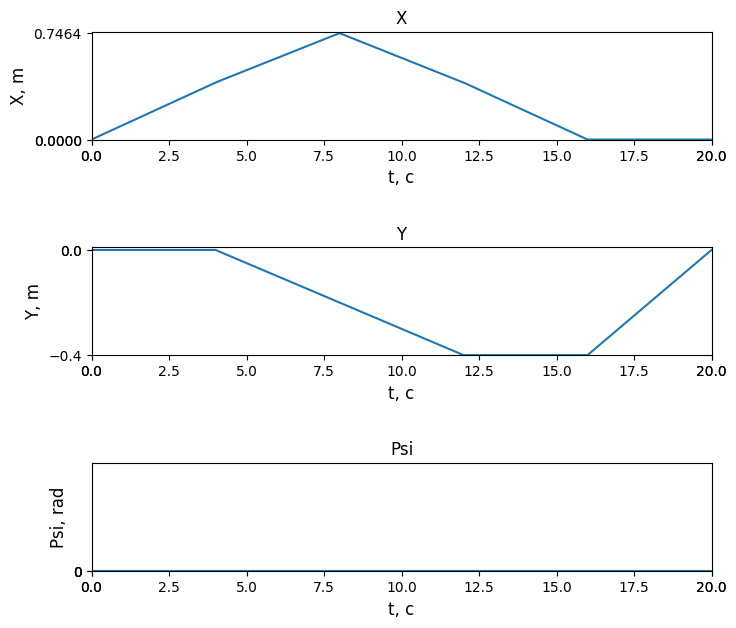

In [11]:
plot_x_y_psi(df_ideal, x_y_max_padding=0.01, om_max_padding=0.0001)

Востановим траекторию по скоростям

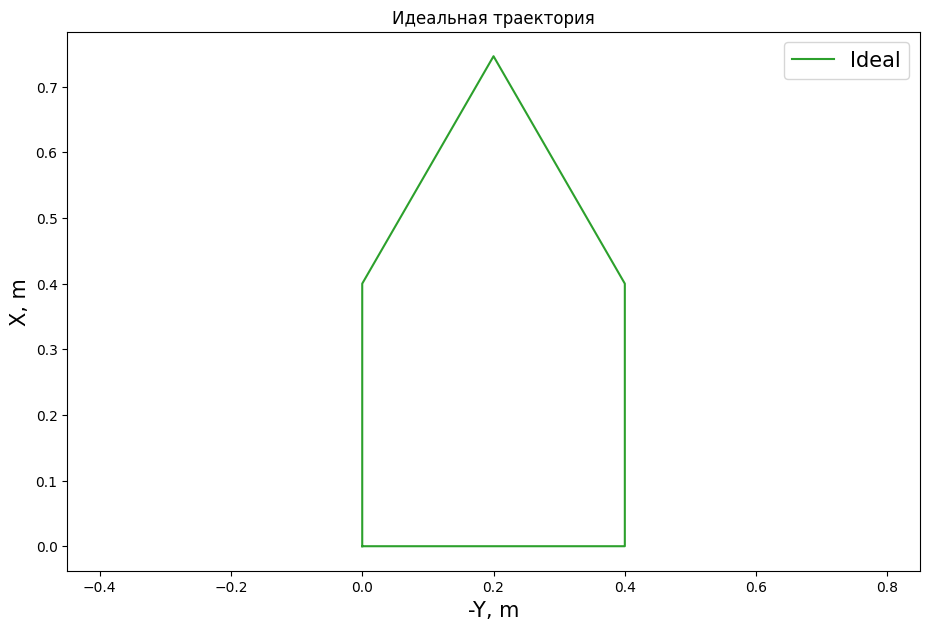

In [12]:
plt.figure(figsize=(11, 7))
plt.title("Идеальная траектория")
plt.plot(-df_ideal['Y'], df_ideal['X'], label="Ideal", color="tab:green")
plt.xlabel("-Y, m", fontsize=15)
plt.ylabel("X, m", fontsize=15)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=15)
plt.show()

## 3. Найти omega при движении по траектории

Функция для построения графиков omega

In [13]:
def plot_om(df, max_padding=0.2):
  fig, ax = plt.subplots(nrows=4)
  ax1, ax2, ax3, ax4 = ax.flatten()

  ax1.plot(df['t'], df['omega_1'])
  ax1.set_title("Omega_1")
  ax1.set_xlabel("t, c", fontsize=12)
  ax1.set_ylabel("Om, 1/c", fontsize=12)
  ax1.set_yticks([0, min(df['omega_1']), max(df['omega_1'])])
  ax1.set_xticks(list(ax1.get_xticks()) + [min(df['t']), max(df['t'])])
  ax1.set_ylim(min(ax1.get_yticks()), max(ax1.get_yticks())+max_padding)
  ax1.set_xlim(min(df['t']), max(df['t']))

  ax2.plot(df['t'], df['omega_2'])
  ax2.set_title("Omega_2")
  ax2.set_xlabel("t, c", fontsize=12)
  ax2.set_ylabel("Om, 1/c", fontsize=12)
  ax2.set_yticks([0, min(df['omega_2']), max(df['omega_2'])])
  ax2.set_xticks(list(ax2.get_xticks()) + [min(df['t']), max(df['t'])])
  ax2.set_ylim(min(ax2.get_yticks()), max(ax2.get_yticks())+max_padding)
  ax2.set_xlim(min(df['t']), max(df['t']))

  ax3.plot(df['t'], df['omega_3'])
  ax3.set_title("Omega_3")
  ax3.set_xlabel("t, c", fontsize=12)
  ax3.set_ylabel("Om, 1/c", fontsize=12)
  ax3.set_yticks([0, min(df['omega_3']), max(df['omega_3'])])
  ax3.set_xticks(list(ax3.get_xticks()) + [min(df['t']), max(df['t'])])
  ax3.set_ylim(min(ax3.get_yticks()), max(ax3.get_yticks())+max_padding)
  ax3.set_xlim(min(df['t']), max(df['t']))

  ax4.plot(df['t'], df['omega_4'])
  ax4.set_title("Omega_4")
  ax4.set_xlabel("t, c", fontsize=12)
  ax4.set_ylabel("Om, 1/c", fontsize=12)
  ax4.set_yticks([0, min(df['omega_4']), max(df['omega_4'])])
  ax4.set_xticks(list(ax4.get_xticks()) + [min(df['t']), max(df['t'])])
  ax4.set_ylim(min(ax4.get_yticks()), max(ax4.get_yticks())+max_padding)
  ax4.set_xlim(min(df['t']), max(df['t']))

  fig.set_size_inches(8, 7)
  plt.subplots_adjust(hspace=1)

In [14]:
df_ideal = get_omega(df_ideal, l, h, R)
df_ideal

,t,Vx,Vy,dpsi,X,Y,psi,omega_1,omega_2,omega_3,omega_4
0,0.00,0.1,0.0,0,0.000000e+00,0.000000e+00,0.0,1.0,1.0,1.0,1.0
1,0.05,0.1,0.0,0,5.000000e-03,0.000000e+00,0.0,1.0,1.0,1.0,1.0
2,0.10,0.1,0.0,0,1.000000e-02,0.000000e+00,0.0,1.0,1.0,1.0,1.0
3,0.15,0.1,0.0,0,1.500000e-02,0.000000e+00,0.0,1.0,1.0,1.0,1.0
4,0.20,0.1,0.0,0,2.000000e-02,0.000000e+00,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
396,19.80,0.0,0.1,0,-8.673617e-17,-2.000000e-02,0.0,1.0,-1.0,1.0,-1.0
397,19.85,0.0,0.1,0,-8.673617e-17,-1.500000e-02,0.0,1.0,-1.0,1.0,-1.0
398,19.90,0.0,0.1,0,-8.673617e-17,-1.000000e-02,0.0,1.0,-1.0,1.0,-1.0
399,19.95,0.0,0.1,0,-8.673617e-17,-5.000000e-03,0.0,1.0,-1.0,1.0,-1.0


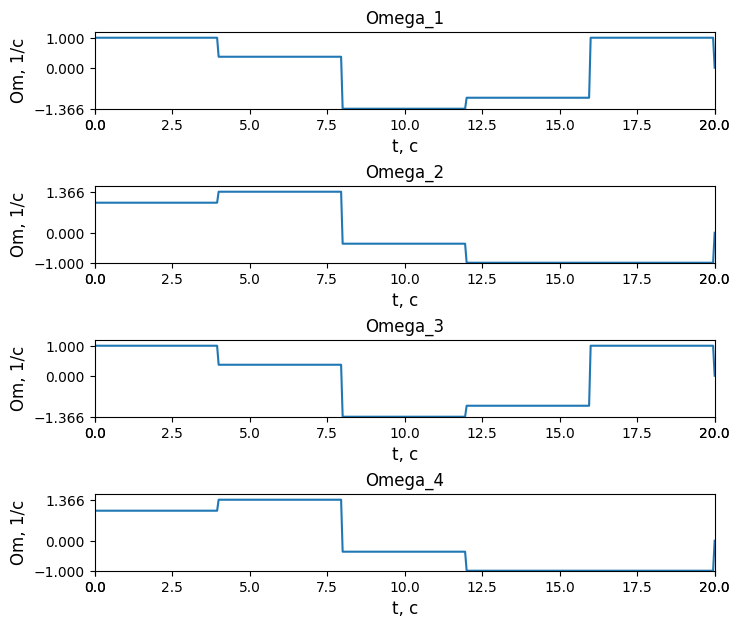

In [15]:
plot_om(df_ideal, max_padding=0.2)

## 4. Сформировать реальные данные с помощью шума

In [16]:
np.random.seed(42)

math_e_1, sko_1 = 0.01*R, 0.05*abs(V)
math_e_2, sko_2 = 0.03*R, 0.05*abs(V)
math_e_3, sko_3 = 0.02*R, 0.05*abs(V)
math_e_4, sko_4 = 0.04*R, 0.05*abs(V)

noise_1 = np.random.normal(math_e_1, sko_1, steps+1)
noise_2 = np.random.normal(math_e_2, sko_2, steps+1)
noise_3 = np.random.normal(math_e_3, sko_3, steps+1)
noise_4 = np.random.normal(math_e_4, sko_4, steps+1)

df_real = df_ideal[['t']].copy()
df_real['omega_1'] = df_ideal['omega_1'] + noise_1
df_real['omega_2'] = df_ideal['omega_2'] + noise_2
df_real['omega_3'] = df_ideal['omega_3'] + noise_3
df_real['omega_4'] = df_ideal['omega_4'] + noise_4
df_real

,t,omega_1,omega_2,omega_3,omega_4
0,0.00,1.003484,1.000003,1.002481,1.006716
1,0.05,1.000309,1.003026,0.999689,1.004244
2,0.10,1.004238,1.003235,0.999828,1.004203
3,0.15,1.008615,1.000750,1.000454,1.000490
4,0.20,0.999829,1.006114,1.003111,1.000685
...,...,...,...,...,...
396,19.80,0.992434,-0.993592,1.003120,-0.999640
397,19.85,1.007769,-0.996858,1.008821,-0.996914
398,19.90,1.000427,-0.996851,1.002626,-0.989126
399,19.95,1.007189,-0.992309,0.999853,-0.999230


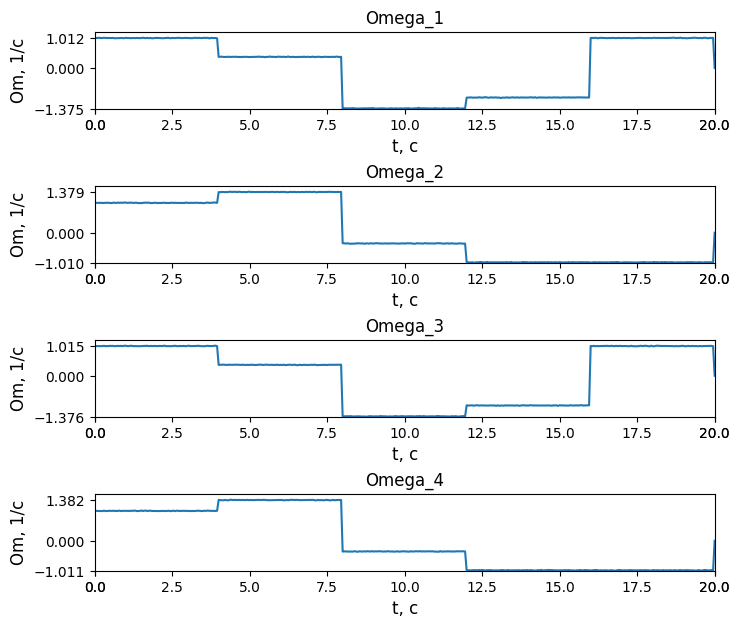

In [17]:
plot_om(df_real, max_padding=0.2)

Найдём скорости по omega

In [18]:
def get_vx_vy_dpsi(df, l, h, R):
  df['dpsi'] = R*(df['omega_1'] - df['omega_2'] - df['omega_3'] + df['omega_4'])/(4*h)
  df['Vx'] = R*(df['omega_1'] + df['omega_2'] + df['omega_3'] + df['omega_4'])/4
  df['Vy'] = R*(df['omega_1'] - df['omega_2'] + df['omega_3'] - df['omega_4'])/4 + df['dpsi']*l
  return df

In [19]:
df_real = get_vx_vy_dpsi(df_real, l, h, R)
df_real

,t,omega_1,omega_2,omega_3,omega_4,dpsi,Vx,Vy
0,0.00,1.003484,1.000003,1.002481,1.006716,0.000643,0.100317,0.000110
1,0.05,1.000309,1.003026,0.999689,1.004244,0.000153,0.100182,-0.000151
2,0.10,1.004238,1.003235,0.999828,1.004203,0.000448,0.100288,0.000005
3,0.15,1.008615,1.000750,1.000454,1.000490,0.000658,0.100258,0.000327
4,0.20,0.999829,1.006114,1.003111,1.000685,-0.000726,0.100243,-0.000242
...,...,...,...,...,...,...,...,...
396,19.80,0.992434,-0.993592,1.003120,-0.999640,-0.001394,0.000058,0.099441
397,19.85,1.007769,-0.996858,1.008821,-0.996914,-0.000092,0.000570,0.100241
398,19.90,1.000427,-0.996851,1.002626,-0.989126,0.000461,0.000427,0.099818
399,19.95,1.007189,-0.992309,0.999853,-0.999230,0.000035,0.000388,0.099971


Найдём координаты

In [20]:
df_real['X'] = integral(df_real['Vx'], dt)
df_real['Y'] = integral(df_real['Vy'], dt)
df_real['psi'] = integral(df_real['dpsi'], dt)
df_real

,t,omega_1,omega_2,omega_3,omega_4,dpsi,Vx,Vy,X,Y,psi
0,0.00,1.003484,1.000003,1.002481,1.006716,0.000643,0.100317,0.000110,0.000000,0.000000,0.000000
1,0.05,1.000309,1.003026,0.999689,1.004244,0.000153,0.100182,-0.000151,0.005016,0.000005,0.000032
2,0.10,1.004238,1.003235,0.999828,1.004203,0.000448,0.100288,0.000005,0.010025,-0.000002,0.000040
3,0.15,1.008615,1.000750,1.000454,1.000490,0.000658,0.100258,0.000327,0.015039,-0.000002,0.000062
4,0.20,0.999829,1.006114,1.003111,1.000685,-0.000726,0.100243,-0.000242,0.020052,0.000015,0.000095
...,...,...,...,...,...,...,...,...,...,...,...
396,19.80,0.992434,-0.993592,1.003120,-0.999640,-0.001394,0.000058,0.099441,0.005342,-0.021677,-0.000190
397,19.85,1.007769,-0.996858,1.008821,-0.996914,-0.000092,0.000570,0.100241,0.005344,-0.016705,-0.000260
398,19.90,1.000427,-0.996851,1.002626,-0.989126,0.000461,0.000427,0.099818,0.005373,-0.011693,-0.000264
399,19.95,1.007189,-0.992309,0.999853,-0.999230,0.000035,0.000388,0.099971,0.005394,-0.006702,-0.000241


Графики координат

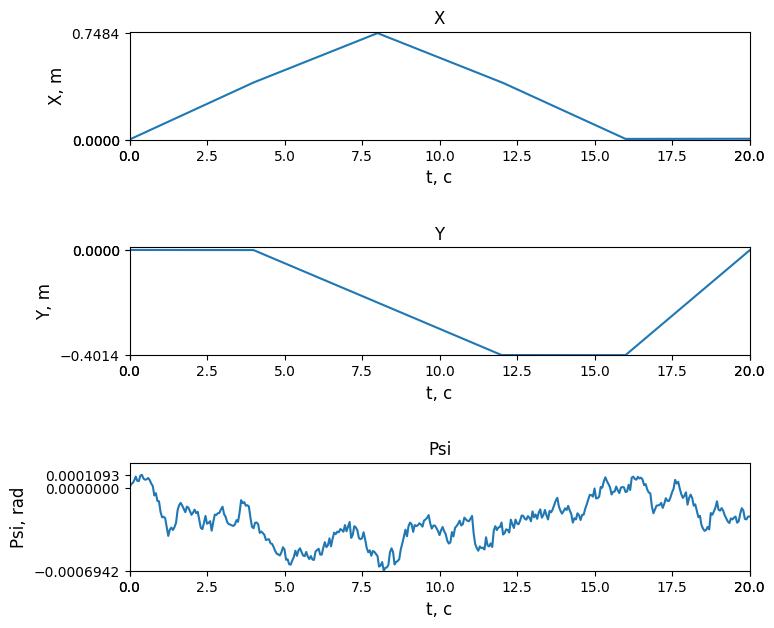

In [21]:
plot_x_y_psi(df_real, x_y_max_padding=0.01, om_max_padding=0.0001)

Востановим траекторию по скоростям

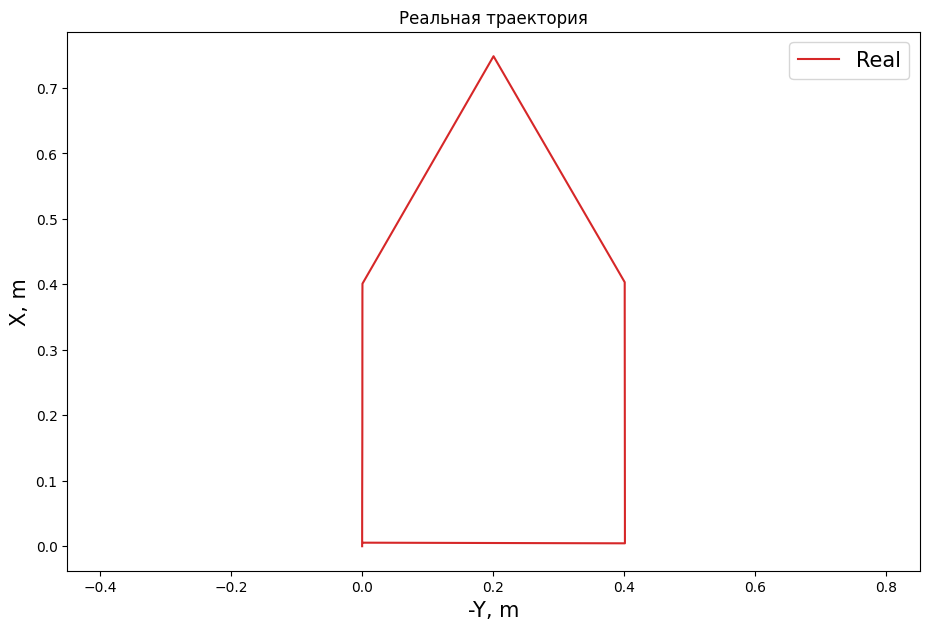

In [22]:
plt.figure(figsize=(11, 7))
plt.title("Реальная траектория")
plt.plot(-df_real['Y'], df_real['X'], label="Real", color="tab:red")
plt.xlabel("-Y, m", fontsize=15)
plt.ylabel("X, m", fontsize=15)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=15)
plt.show()

Посмотрим на отклонения реальных данных от идеальных

In [23]:
columns_for_difference = ['omega_1', 'omega_2', 'omega_3', 'omega_4', 'Vx', 'Vy', 'dpsi', 'X', 'Y', 'psi']
df_diff_real = df_ideal[['t']].copy()
df_diff_real[columns_for_difference] = df_ideal[columns_for_difference] - df_real[columns_for_difference]
df_diff_real

,t,omega_1,omega_2,omega_3,omega_4,Vx,Vy,dpsi,X,Y,psi
0,0.00,-0.003484,-0.000003,-0.002481,-0.006716,-0.000317,-0.000110,-0.000643,0.000000,0.000000,0.000000
1,0.05,-0.000309,-0.003026,0.000311,-0.004244,-0.000182,0.000151,-0.000153,-0.000016,-0.000005,-0.000032
2,0.10,-0.004238,-0.003235,0.000172,-0.004203,-0.000288,-0.000005,-0.000448,-0.000025,0.000002,-0.000040
3,0.15,-0.008615,-0.000750,-0.000454,-0.000490,-0.000258,-0.000327,-0.000658,-0.000039,0.000002,-0.000062
4,0.20,0.000171,-0.006114,-0.003111,-0.000685,-0.000243,0.000242,0.000726,-0.000052,-0.000015,-0.000095
...,...,...,...,...,...,...,...,...,...,...,...
396,19.80,0.007566,-0.006408,-0.003120,-0.000360,-0.000058,0.000559,0.001394,-0.005342,0.001677,0.000190
397,19.85,-0.007769,-0.003142,-0.008821,-0.003086,-0.000570,-0.000241,0.000092,-0.005344,0.001705,0.000260
398,19.90,-0.000427,-0.003149,-0.002626,-0.010874,-0.000427,0.000182,-0.000461,-0.005373,0.001693,0.000264
399,19.95,-0.007189,-0.007691,0.000147,-0.000770,-0.000388,0.000029,-0.000035,-0.005394,0.001702,0.000241


Отклонения по omega

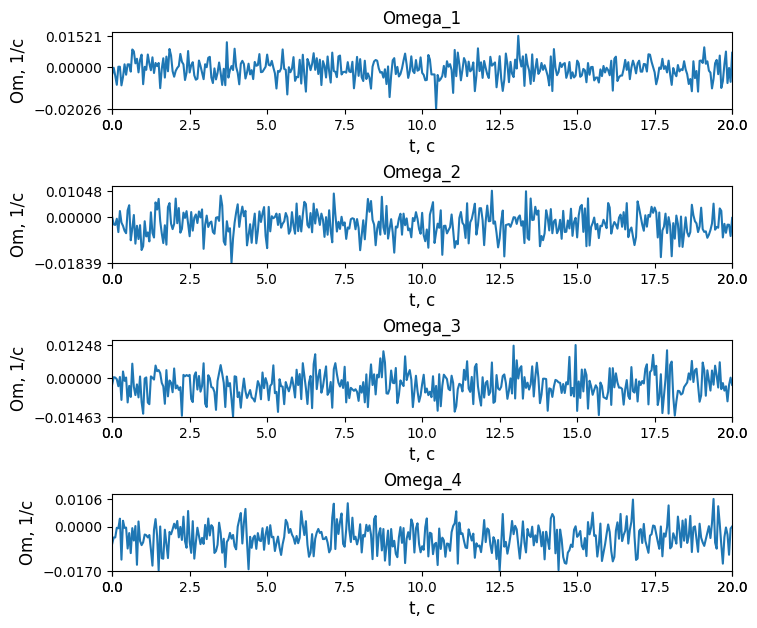

In [24]:
plot_om(df_diff_real, max_padding=0.002)

Отклонение по координатам

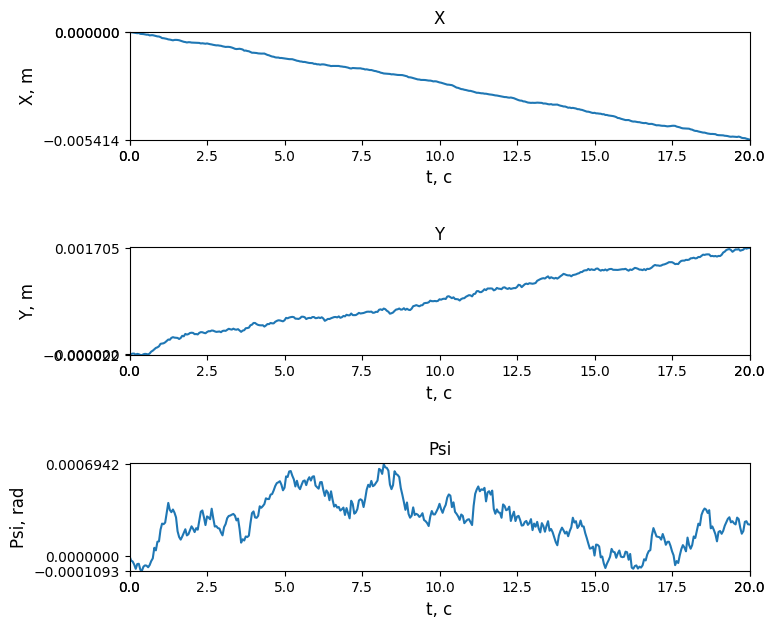

In [25]:
plot_x_y_psi(df_diff_real, x_y_max_padding=0.00001, om_max_padding=0.00001)

Сравним траектории

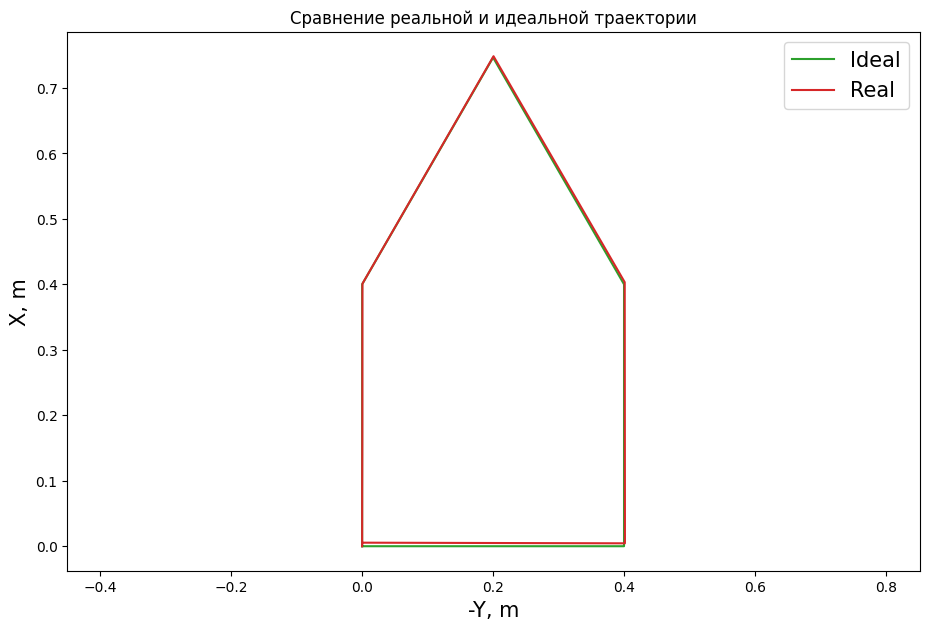

In [26]:
plt.figure(figsize=(11, 7))
plt.title("Сравнение реальной и идеальной траектории")
plt.plot(-df_ideal['Y'], df_ideal['X'], label="Ideal", color="tab:green")
plt.plot(-df_real['Y'], df_real['X'], label="Real", color="tab:red")
plt.xlabel("-Y, m", fontsize=15)
plt.ylabel("X, m", fontsize=15)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=15)
plt.show()

## 5. Берём в качестве реальных данных данные из 4 пункта

## 6. Формирование ПИ-регулятора по угловым скоростям

In [27]:
def PI_regulator(omega_ideal, omega_vost, f_ideal, f_vost, KP, KI):
  P_error = omega_vost - omega_ideal
  I_error = f_vost - f_ideal
  sum_error = KP*P_error + KI*I_error
  return sum_error

In [28]:
def get_vost_omega(omega_ideal, omega_real, dt, KP=0.01, KI=5.0):
  f_ideal = 0
  f_vost = 0
  omega_vost_i = omega_real[0]
  omega_vost_list = []
  for i in range(steps+1):
    omega_ideal_i = omega_ideal[i]
    omega_vost_list.append(omega_vost_i)
    f_ideal += omega_ideal_i * dt
    f_vost += omega_vost_i * dt
    sum_error = PI_regulator(omega_ideal_i, omega_vost_i, f_ideal, f_vost, KP, KI)
    if i != steps:
      omega_vost_i = omega_real[i+1] - sum_error
  return omega_vost_list

Смоделируем угловые скорости полученные с помощью ПИ-регулятора

In [29]:
KP = 0.01
KI = 5.0
df_vost = df_ideal[['t']].copy()
df_vost['omega_1'] = get_vost_omega(df_ideal['omega_1'], df_real['omega_1'], dt, KP, KI)
df_vost['omega_2'] = get_vost_omega(df_ideal['omega_2'], df_real['omega_2'], dt, KP, KI)
df_vost['omega_3'] = get_vost_omega(df_ideal['omega_3'], df_real['omega_3'], dt, KP, KI)
df_vost['omega_4'] = get_vost_omega(df_ideal['omega_4'], df_real['omega_4'], dt, KP, KI)
df_vost

,t,omega_1,omega_2,omega_3,omega_4
0,0.00,1.003484,1.000003,1.002481,1.006716
1,0.05,0.999403,1.003025,0.999044,1.002498
2,0.10,1.003523,1.002448,0.999456,1.001874
3,0.15,1.006978,0.999356,1.000215,0.997699
4,0.20,0.996413,1.004913,1.002810,0.998512
...,...,...,...,...,...
396,19.80,0.990284,-0.996265,1.001422,-1.004223
397,19.85,1.008098,-1.000501,1.006794,-1.000408
398,19.90,0.998553,-1.000326,0.998848,-0.992555
399,19.95,1.005772,-0.995704,0.996442,-1.004599


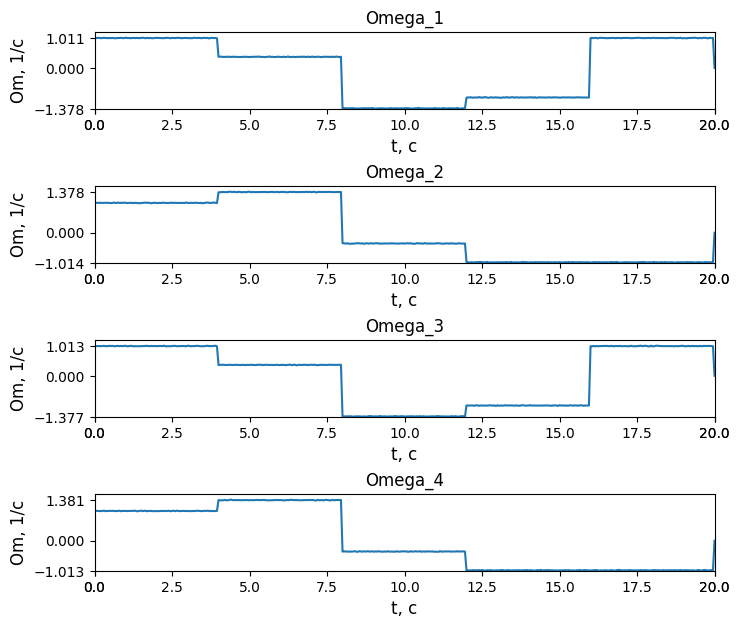

In [30]:
plot_om(df_vost, max_padding=0.2)

Найдём скорости по omega

In [31]:
df_vost = get_vx_vy_dpsi(df_vost, l, h, R)
df_vost

,t,omega_1,omega_2,omega_3,omega_4,dpsi,Vx,Vy
0,0.00,1.003484,1.000003,1.002481,1.006716,0.000643,0.100317,0.000110
1,0.05,0.999403,1.003025,0.999044,1.002498,-0.000014,0.100099,-0.000180
2,0.10,1.003523,1.002448,0.999456,1.001874,0.000291,0.100183,0.000025
3,0.15,1.006978,0.999356,1.000215,0.997699,0.000425,0.100106,0.000339
4,0.20,0.996413,1.004913,1.002810,0.998512,-0.001067,0.100066,-0.000318
...,...,...,...,...,...,...,...,...
396,19.80,0.990284,-0.996265,1.001422,-1.004223,-0.001591,-0.000220,0.099487
397,19.85,1.008098,-1.000501,1.006794,-1.000408,0.000116,0.000350,0.100418
398,19.90,0.998553,-1.000326,0.998848,-0.992555,0.000623,0.000113,0.099882
399,19.95,1.005772,-0.995704,0.996442,-1.004599,0.000036,0.000048,0.100070


Найдём координаты

In [32]:
df_vost['X'] = integral(df_vost['Vx'], dt)
df_vost['Y'] = integral(df_vost['Vy'], dt)
df_vost['psi'] = integral(df_vost['dpsi'], dt)
df_vost

,t,omega_1,omega_2,omega_3,omega_4,dpsi,Vx,Vy,X,Y,psi
0,0.00,1.003484,1.000003,1.002481,1.006716,0.000643,0.100317,0.000110,0.000000,0.000000,0.000000e+00
1,0.05,0.999403,1.003025,0.999044,1.002498,-0.000014,0.100099,-0.000180,0.005016,0.000005,3.215138e-05
2,0.10,1.003523,1.002448,0.999456,1.001874,0.000291,0.100183,0.000025,0.010021,-0.000004,3.145093e-05
3,0.15,1.006978,0.999356,1.000215,0.997699,0.000425,0.100106,0.000339,0.015030,-0.000002,4.600761e-05
4,0.20,0.996413,1.004913,1.002810,0.998512,-0.001067,0.100066,-0.000318,0.020035,0.000015,6.728256e-05
...,...,...,...,...,...,...,...,...,...,...,...
396,19.80,0.990284,-0.996265,1.001422,-1.004223,-0.001591,-0.000220,0.099487,0.000056,-0.020009,4.102006e-05
397,19.85,1.008098,-1.000501,1.006794,-1.000408,0.000116,0.000350,0.100418,0.000045,-0.015035,-3.854663e-05
398,19.90,0.998553,-1.000326,0.998848,-0.992555,0.000623,0.000113,0.099882,0.000062,-0.010014,-3.272853e-05
399,19.95,1.005772,-0.995704,0.996442,-1.004599,0.000036,0.000048,0.100070,0.000068,-0.005020,-1.576329e-06


Графики координат

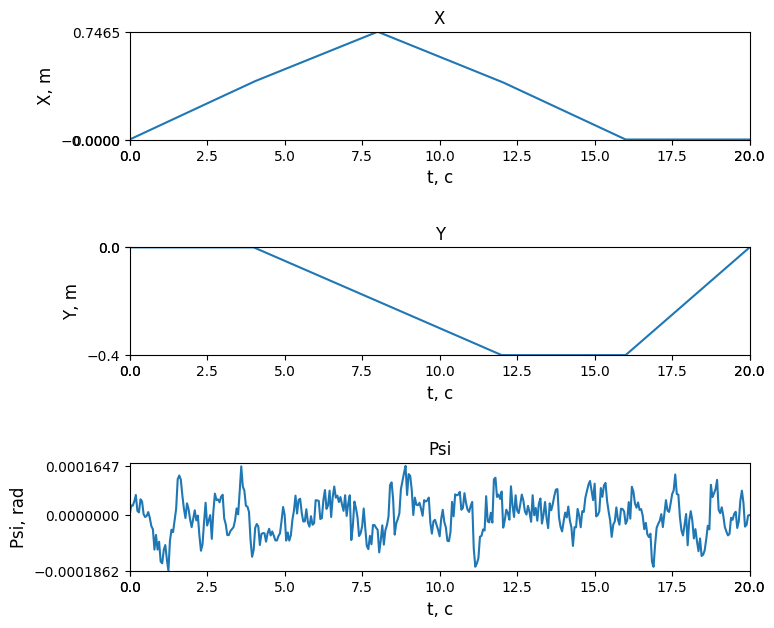

In [33]:
plot_x_y_psi(df_vost, x_y_max_padding=0.00001, om_max_padding=0.00001)

Восстановим траекторию по скоростям

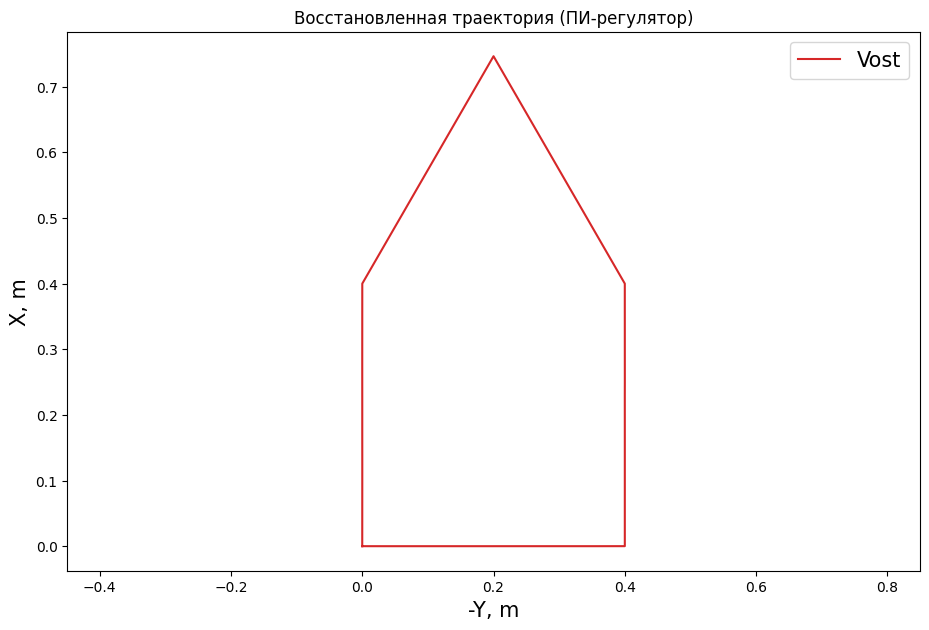

In [34]:
plt.figure(figsize=(11, 7))
plt.title("Восстановленная траектория (ПИ-регулятор)")
plt.plot(-df_vost['Y'], df_vost['X'], label="Vost", color="tab:red")
plt.xlabel("-Y, m", fontsize=15)
plt.ylabel("X, m", fontsize=15)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=15)
plt.show()

Сравним отклонения восстановленных данных от идеальных с отклонениями реальных данных от идеальных

In [35]:
columns_for_difference = ['omega_1', 'omega_2', 'omega_3', 'omega_4', 'Vx', 'Vy', 'dpsi', 'X', 'Y', 'psi']
df_diff_vost = df_ideal[['t']].copy()
df_diff_vost[columns_for_difference] = df_ideal[columns_for_difference] - df_vost[columns_for_difference]
df_diff_vost

,t,omega_1,omega_2,omega_3,omega_4,Vx,Vy,dpsi,X,Y,psi
0,0.00,-0.003484,-0.000003,-0.002481,-0.006716,-0.000317,-0.000110,-0.000643,0.000000,0.000000,0.000000e+00
1,0.05,0.000597,-0.003025,0.000956,-0.002498,-0.000099,0.000180,0.000014,-0.000016,-0.000005,-3.215138e-05
2,0.10,-0.003523,-0.002448,0.000544,-0.001874,-0.000183,-0.000025,-0.000291,-0.000021,0.000004,-3.145093e-05
3,0.15,-0.006978,0.000644,-0.000215,0.002301,-0.000106,-0.000339,-0.000425,-0.000030,0.000002,-4.600761e-05
4,0.20,0.003587,-0.004913,-0.002810,0.001488,-0.000066,0.000318,0.001067,-0.000035,-0.000015,-6.728256e-05
...,...,...,...,...,...,...,...,...,...,...,...
396,19.80,0.009716,-0.003735,-0.001422,0.004223,0.000220,0.000513,0.001591,-0.000056,0.000009,-4.102006e-05
397,19.85,-0.008098,0.000501,-0.006794,0.000408,-0.000350,-0.000418,-0.000116,-0.000045,0.000035,3.854663e-05
398,19.90,0.001447,0.000326,0.001152,-0.007445,-0.000113,0.000118,-0.000623,-0.000062,0.000014,3.272853e-05
399,19.95,-0.005772,-0.004296,0.003558,0.004599,-0.000048,-0.000070,-0.000036,-0.000068,0.000020,1.576329e-06


Отклонения по omega

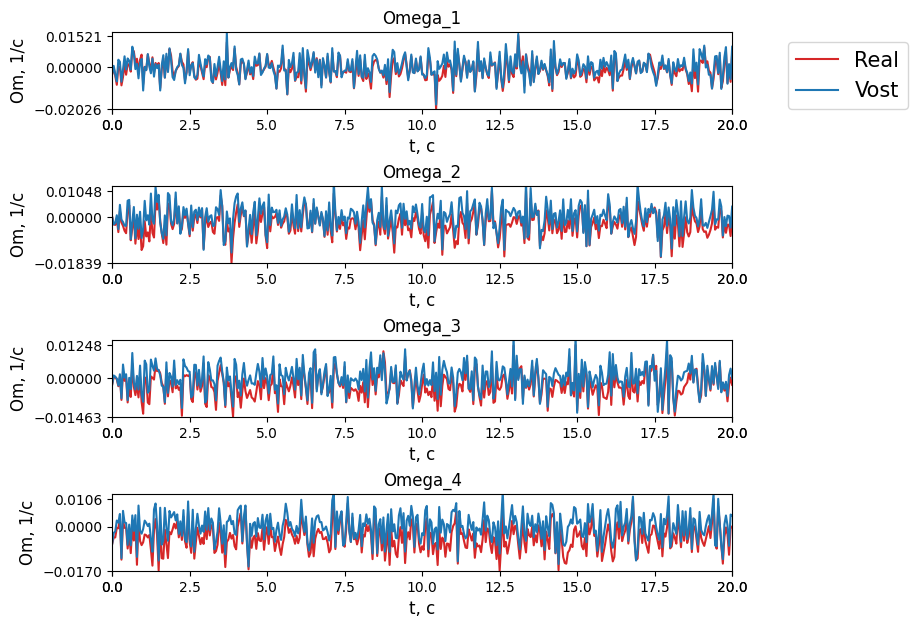

In [36]:
fig, ax = plt.subplots(nrows=4)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.plot(df_diff_real['t'], df_diff_real['omega_1'], color="tab:red", label="Real")
ax1.plot(df_diff_vost['t'], df_diff_vost['omega_1'], color="tab:blue", label="Vost")
ax1.set_title("Omega_1")
ax1.set_xlabel("t, c", fontsize=12)
ax1.set_ylabel("Om, 1/c", fontsize=12)
ax1.set_yticks([0, min(df_diff_real['omega_1']), max(df_diff_real['omega_1'])])
ax1.set_xticks(list(ax1.get_xticks()) + [min(df_diff_real['t']), max(df_diff_real['t'])])
ax1.set_ylim(min(ax1.get_yticks()), max(ax1.get_yticks())+0.002)
ax1.set_xlim(min(df_diff_real['t']), max(df_diff_real['t']))
ax1.legend(bbox_to_anchor=(1.3, 1.), fontsize=15)

ax2.plot(df_diff_real['t'], df_diff_real['omega_2'], color="tab:red", label="Real")
ax2.plot(df_diff_vost['t'], df_diff_vost['omega_2'], color="tab:blue", label="Vost")
ax2.set_title("Omega_2")
ax2.set_xlabel("t, c", fontsize=12)
ax2.set_ylabel("Om, 1/c", fontsize=12)
ax2.set_yticks([0, min(df_diff_real['omega_2']), max(df_diff_real['omega_2'])])
ax2.set_xticks(list(ax2.get_xticks()) + [min(df_diff_real['t']), max(df_diff_real['t'])])
ax2.set_ylim(min(ax2.get_yticks()), max(ax2.get_yticks())+0.002)
ax2.set_xlim(min(df_diff_real['t']), max(df_diff_real['t']))

ax3.plot(df_diff_real['t'], df_diff_real['omega_3'], color="tab:red", label="Real")
ax3.plot(df_diff_vost['t'], df_diff_vost['omega_3'], color="tab:blue", label="Vost")
ax3.set_title("Omega_3")
ax3.set_xlabel("t, c", fontsize=12)
ax3.set_ylabel("Om, 1/c", fontsize=12)
ax3.set_yticks([0, min(df_diff_real['omega_3']), max(df_diff_real['omega_3'])])
ax3.set_xticks(list(ax3.get_xticks()) + [min(df_diff_real['t']), max(df_diff_real['t'])])
ax3.set_ylim(min(ax3.get_yticks()), max(ax3.get_yticks())+0.002)
ax3.set_xlim(min(df_diff_real['t']), max(df_diff_real['t']))

ax4.plot(df_diff_real['t'], df_diff_real['omega_4'], color="tab:red", label="Real")
ax4.plot(df_diff_vost['t'], df_diff_vost['omega_4'], color="tab:blue", label="Vost")
ax4.set_title("Omega_4")
ax4.set_xlabel("t, c", fontsize=12)
ax4.set_ylabel("Om, 1/c", fontsize=12)
ax4.set_yticks([0, min(df_diff_real['omega_4']), max(df_diff_real['omega_4'])])
ax4.set_xticks(list(ax4.get_xticks()) + [min(df_diff_real['t']), max(df_diff_real['t'])])
ax4.set_ylim(min(ax4.get_yticks()), max(ax4.get_yticks())+0.002)
ax4.set_xlim(min(df_diff_real['t']), max(df_diff_real['t']))

fig.set_size_inches(8, 7)
plt.subplots_adjust(hspace=1)
plt.show()

Отклонения по координатам

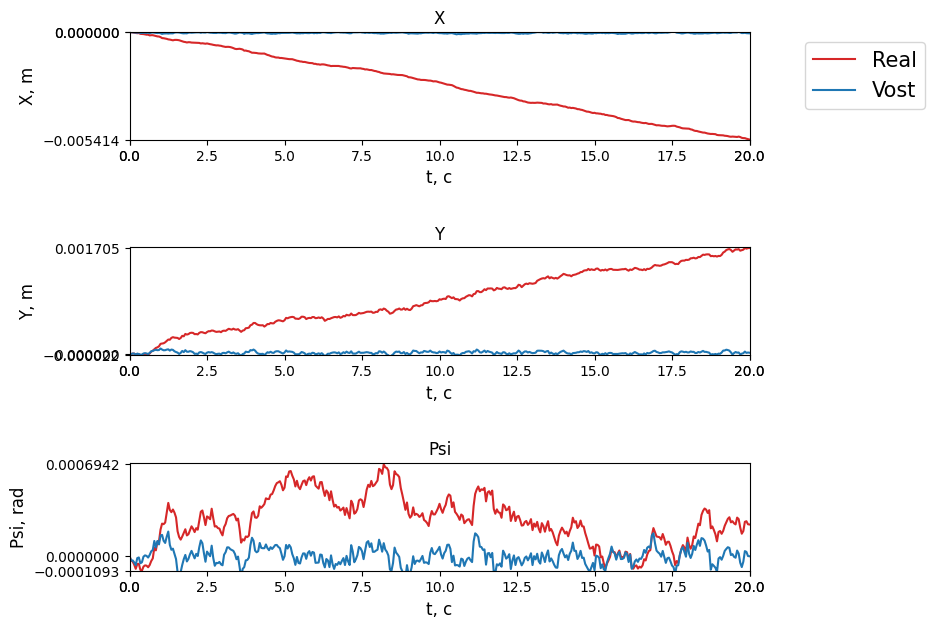

In [37]:
fig, ax = plt.subplots(nrows=3)
ax1, ax2, ax3 = ax.flatten()

ax1.plot(df_diff_real['t'], df_diff_real['X'], color="tab:red", label="Real")
ax1.plot(df_diff_vost['t'], df_diff_vost['X'], color="tab:blue", label="Vost")
ax1.set_title("X")
ax1.set_xlabel("t, c", fontsize=12)
ax1.set_ylabel("X, m", fontsize=12)
ax1.set_yticks([0, min(df_diff_real['X']), max(df_diff_real['X'])])
ax1.set_xticks(list(ax1.get_xticks()) + [min(df_diff_real['t']), max(df_diff_real['t'])])
ax1.set_ylim(min(ax1.get_yticks()), max(ax1.get_yticks())+0.00001)
ax1.set_xlim(min(df_diff_real['t']), max(df_diff_real['t']))
ax1.legend(bbox_to_anchor=(1.3, 1.), fontsize=15)

ax2.plot(df_diff_real['t'], df_diff_real['Y'], color="tab:red", label="Real")
ax2.plot(df_diff_vost['t'], df_diff_vost['Y'], color="tab:blue", label="Vost")
ax2.set_title("Y")
ax2.set_xlabel("t, c", fontsize=12)
ax2.set_ylabel("Y, m", fontsize=12)
ax2.set_yticks([0, min(df_diff_real['Y']), max(df_diff_real['Y'])])
ax2.set_xticks(list(ax2.get_xticks()) + [min(df_diff_real['t']), max(df_diff_real['t'])])
ax2.set_ylim(min(ax2.get_yticks()), max(ax2.get_yticks())+0.00001)
ax2.set_xlim(min(df_diff_real['t']), max(df_diff_real['t']))

ax3.plot(df_diff_real['t'], df_diff_real['psi'], color="tab:red", label="Real")
ax3.plot(df_diff_vost['t'], df_diff_vost['psi'], color="tab:blue", label="Vost")
ax3.set_title("Psi")
ax3.set_xlabel("t, c", fontsize=12)
ax3.set_ylabel("Psi, rad", fontsize=12)
ax3.set_yticks([0, min(df_diff_real['psi']), max(df_diff_real['psi'])])
ax3.set_xticks(list(ax3.get_xticks()) + [min(df_diff_real['t']), max(df_diff_real['t'])])
ax3.set_ylim(min(ax3.get_yticks()), max(ax3.get_yticks())+0.00001)
ax3.set_xlim(min(df_diff_real['t']), max(df_diff_real['t']))

fig.set_size_inches(8, 7)
plt.subplots_adjust(hspace=1)

Сравним траектории

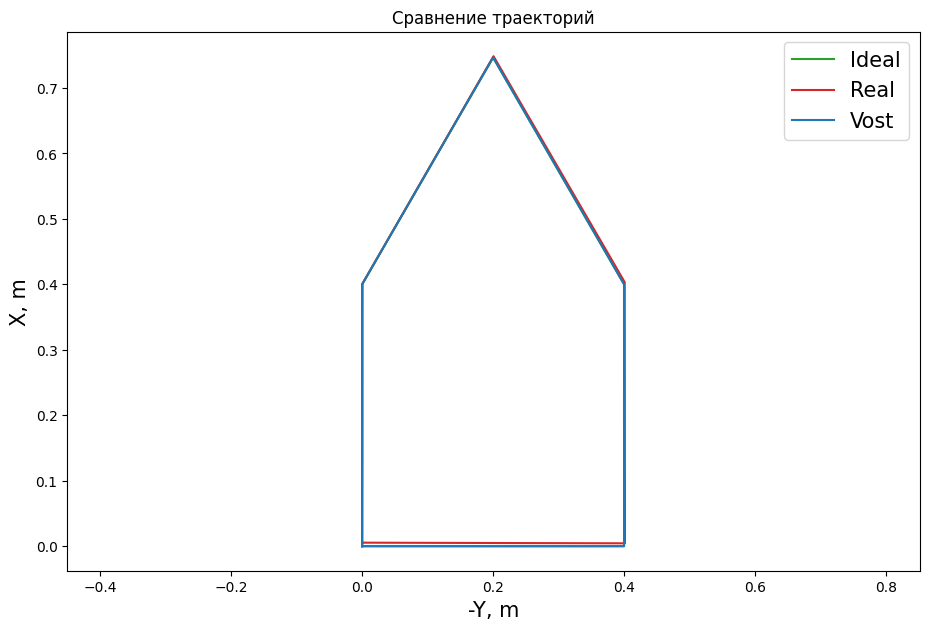

In [38]:
plt.figure(figsize=(11, 7))
plt.title("Сравнение траекторий")
plt.plot(-df_ideal['Y'], df_ideal['X'], label="Ideal", color="tab:green")
plt.plot(-df_real['Y'], df_real['X'], label="Real", color="tab:red")
plt.plot(-df_vost['Y'], df_vost['X'], label="Vost", color="tab:blue")
plt.xlabel("-Y, m", fontsize=15)
plt.ylabel("X, m", fontsize=15)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=15)
plt.show()

### Найдём СКО и мат. ожидание для разниц координат

In [39]:
def math_e(series):
  return series.sum()/len(series)

In [40]:
def s_dev(series, Math_e):
  return (sum((series - Math_e)**2)/len(series))**(1/2)

In [41]:
def get_table_Math_SKO(ddf_ir, ddf_iv):
  df_math_sko = pd.DataFrame({ 
     'omega_1': [math_e(ddf_ir['omega_1']),
           s_dev(ddf_ir['omega_1'], math_e(ddf_ir['omega_1'])),
           math_e(ddf_iv['omega_1']),
           s_dev(ddf_iv['omega_1'], math_e(ddf_iv['omega_1']))], 
     'omega_2': [math_e(ddf_ir['omega_2']),
           s_dev(ddf_ir['omega_2'], math_e(ddf_ir['omega_2'])),
           math_e(ddf_iv['omega_2']),
           s_dev(ddf_iv['omega_2'], math_e(ddf_iv['omega_2']))],
     'omega_3': [math_e(ddf_ir['omega_3']),
           s_dev(ddf_ir['omega_3'], math_e(ddf_ir['omega_3'])),
           math_e(ddf_iv['omega_3']),
           s_dev(ddf_iv['omega_3'], math_e(ddf_iv['omega_3']))], 
     'omega_4': [math_e(ddf_ir['omega_4']),
           s_dev(ddf_ir['omega_4'], math_e(ddf_ir['omega_4'])),
           math_e(ddf_iv['omega_4']),
           s_dev(ddf_iv['omega_4'], math_e(ddf_iv['omega_4']))], 
     'Vx': [math_e(ddf_ir['Vx']),
           s_dev(ddf_ir['Vx'], math_e(ddf_ir['Vx'])),
           math_e(ddf_iv['Vx']),
           s_dev(ddf_iv['Vx'], math_e(ddf_iv['Vx']))],
     'Vy': [math_e(ddf_ir['Vy']),
           s_dev(ddf_ir['Vy'], math_e(ddf_ir['Vy'])),
           math_e(ddf_iv['Vy']),
           s_dev(ddf_iv['Vy'], math_e(ddf_iv['Vy']))],
     'dpsi': [math_e(ddf_ir['dpsi']),
           s_dev(ddf_ir['dpsi'], math_e(ddf_ir['dpsi'])),
           math_e(ddf_iv['dpsi']),
           s_dev(ddf_iv['dpsi'], math_e(ddf_iv['dpsi']))],
     'X': [math_e(ddf_ir['X']),
           s_dev(ddf_ir['X'], math_e(ddf_ir['X'])),
           math_e(ddf_iv['X']),
           s_dev(ddf_iv['X'], math_e(ddf_iv['X']))], 
     'Y': [math_e(ddf_ir['Y']),
           s_dev(ddf_ir['Y'], math_e(ddf_ir['Y'])),
           math_e(ddf_iv['Y']),
           s_dev(ddf_iv['Y'], math_e(ddf_iv['Y']))], 
     'Psi': [math_e(ddf_ir['psi']),
           s_dev(ddf_ir['psi'], math_e(ddf_ir['psi'])),
           math_e(ddf_iv['psi']),
           s_dev(ddf_iv['psi'], math_e(ddf_iv['psi']))]},
      index=["Math_ir", "SKO_ir", "Math_iv", "SKO_iv"])
  return df_math_sko

In [42]:
df_math_sko = get_table_Math_SKO(df_diff_real, df_diff_vost)
df_math_sko

,omega_1,omega_2,omega_3,omega_4,Vx,Vy,dpsi,X,Y,Psi
Math_ir,-0.001093,-0.002834,-0.002646,-0.004219,-0.000270,0.000086,0.000014,-0.002673,0.000888,0.000271
SKO_ir,0.004806,0.005013,0.004946,0.005056,0.000258,0.000296,0.000866,0.001598,0.000466,0.000185
Math_iv,-0.000004,-0.000034,-0.000026,-0.000031,-0.000002,0.000001,0.000002,-0.000053,0.000017,0.000002
SKO_iv,0.005190,0.005387,0.005276,0.005395,0.000272,0.000320,0.000930,0.000022,0.000021,0.000064


Во сколько раз улучшилась точность с ПИ-регулятором

In [43]:
pd.DataFrame(abs(df_math_sko[['X', 'Y', 'Psi']].values[0:2]) / abs(df_math_sko[['X', 'Y', 'Psi']].values[2:4]), 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,49.997223,52.622607,113.354922
SKO,74.186401,22.164293,2.911851
